In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the limit on number of columns printed
pd.set_option('display.max_columns', None)

# Change tick precision to 3 decimal places
from matplotlib.ticker import FormatStrFormatter

# Task 1

## Data retrieving

In [3]:
# Load data with feature names as listed in the dataset description
auto = pd.read_csv('Automobile.csv', sep='#', header=0,
                  names = ['Insurance risk rating', 'Normalised-losses', 'Make', 'Fuel-type', 'Aspiration',
                          'Num-of-doors', 'Body-style', 'Drive-wheels', 'Engine-location', 'Wheel-base',
                          'Length', 'Width', 'Height', 'Curb-weight', 'Engine-type', 'Num-of-cylinders',
                          'Engine-size', 'Fuel-system', 'Bore', 'Stroke', 'Compression', 'Horsepower',
                          'Peak-rpm', 'City-mpg', 'Highway-mpg', 'Price'])

# Print null counts and data types
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Insurance risk rating  237 non-null    int64  
 1   Normalised-losses      191 non-null    float64
 2   Make                   237 non-null    object 
 3   Fuel-type              237 non-null    object 
 4   Aspiration             237 non-null    object 
 5   Num-of-doors           235 non-null    object 
 6   Body-style             237 non-null    object 
 7   Drive-wheels           237 non-null    object 
 8   Engine-location        237 non-null    object 
 9   Wheel-base             237 non-null    float64
 10  Length                 237 non-null    float64
 11  Width                  237 non-null    float64
 12  Height                 237 non-null    float64
 13  Curb-weight            237 non-null    int64  
 14  Engine-type            237 non-null    object 
 15  Num-of

In [4]:
# Print first 5 rows and check the column names are appropriate
auto.head()

,Insurance risk rating,Normalised-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,Length,Width,Height,Curb-weight,Engine-type,Num-of-cylinders,Engine-size,Fuel-system,Bore,Stroke,Compression,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0


## Check data types

In [5]:
# Print data types
auto.dtypes

Insurance risk rating      int64
Normalised-losses        float64
Make                      object
Fuel-type                 object
Aspiration                object
Num-of-doors              object
Body-style                object
Drive-wheels              object
Engine-location           object
Wheel-base               float64
Length                   float64
Width                    float64
Height                   float64
Curb-weight                int64
Engine-type               object
Num-of-cylinders          object
Engine-size                int64
Fuel-system               object
Bore                     float64
Stroke                   float64
Compression              float64
Horsepower               float64
Peak-rpm                 float64
City-mpg                   int64
Highway-mpg                int64
Price                    float64
dtype: object

In [6]:
# Number of cylinders is an ordinal variable and should be an integer.  Check unique values
print(auto['Num-of-cylinders'].unique())

# Make all string into upper case
auto['Num-of-cylinders'] = auto['Num-of-cylinders'].str.upper()

# Remove whitespace
auto['Num-of-cylinders'] = auto['Num-of-cylinders'].str.strip()

# Map strings to integers
auto['Num-of-cylinders'] = auto['Num-of-cylinders'].map({'THREE':3, 'FOUR':4, 'FIVE':5, 'SIX':6,
                                                        'EIGHT':8, 'TWELVE':12, 'TWO':2})

# Check final unique values
print(auto['Num-of-cylinders'].unique())

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight' 'Four' 'five ' ' four']
[ 4  6  5  3 12  2  8]


In [7]:
# Check data types again
auto.dtypes

Insurance risk rating      int64
Normalised-losses        float64
Make                      object
Fuel-type                 object
Aspiration                object
Num-of-doors              object
Body-style                object
Drive-wheels              object
Engine-location           object
Wheel-base               float64
Length                   float64
Width                    float64
Height                   float64
Curb-weight                int64
Engine-type               object
Num-of-cylinders           int64
Engine-size                int64
Fuel-system               object
Bore                     float64
Stroke                   float64
Compression              float64
Horsepower               float64
Peak-rpm                 float64
City-mpg                   int64
Highway-mpg                int64
Price                    float64
dtype: object

## Typos

In [8]:
# Print unique values in every feature to check for types
for col in auto.columns:
    print(f'{col} unique values: {auto[col].unique()}\n')

Insurance risk rating unique values: [ 3  1  2  0 -1 -2  4]

Normalised-losses unique values: [ nan 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 122. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.
  87.  77.  91. 134.  65. 197.  90.  94. 256.  95.  25.]

Make unique values: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'Nissan' 'Peugot'
 'peugot' 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota'
 'volkswagen' 'volvo' 'volvo ' ' volvo ' 'vol00112ov']

Fuel-type unique values: ['gas' 'diesel' 'Gas' 'Diesel' 'gas ']

Aspiration unique values: ['std' 'turbo' 'Std' 'std ' 'turrrrbo']

Num-of-doors unique values: ['two' 'four' nan 'Four' 'four ' 'fourR']

Body-style unique values: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop' 'Sedan' 'Wagon'
 'sedan ']

Drive-wheels unique values: ['rwd' 

In [9]:
# Fix typos in the make feature
auto.loc[auto['Make'] == 'vol00112ov', 'Make'] = 'Volvo'

# Fix typos in the aspiration feature
auto.loc[auto['Aspiration'] == 'turrrrbo', 'Aspiration'] = 'turbo'

# Change 4wd to fwd in drive-wheels feature so it can use strip and upper methods
auto.loc[auto['Drive-wheels'] == '4wd', 'Drive-wheels'] = 'fwd'

# Correct the typo fourR in the number of doors feature
auto.loc[auto['Num-of-doors'] == 'fourR', 'Num-of-doors'] = 'four'

## Extra-whitespaces

In [10]:
# Get the list of feature names that have object datatype
string_features = auto.columns[auto.dtypes == object]

# Strip whitespaces for each column in the list
for col in string_features:
    auto[col] = auto[col].str.strip()

## Upper/lower case

In [11]:
# Convert all text columns to upper case
for col in string_features:
    auto[col] = auto[col].str.upper()

## Missing values

In [12]:
# Check which columns have missing values
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Insurance risk rating  237 non-null    int64  
 1   Normalised-losses      191 non-null    float64
 2   Make                   237 non-null    object 
 3   Fuel-type              237 non-null    object 
 4   Aspiration             237 non-null    object 
 5   Num-of-doors           235 non-null    object 
 6   Body-style             237 non-null    object 
 7   Drive-wheels           237 non-null    object 
 8   Engine-location        237 non-null    object 
 9   Wheel-base             237 non-null    float64
 10  Length                 237 non-null    float64
 11  Width                  237 non-null    float64
 12  Height                 237 non-null    float64
 13  Curb-weight            237 non-null    int64  
 14  Engine-type            237 non-null    object 
 15  Num-of

In [13]:
# There are only two rows which are missing for the number of doors, and filling with mean is not 
# appropriate for this variable.  Remove them
auto = auto.loc[auto['Num-of-doors'] == auto['Num-of-doors']]

# Print the names of the remaining columns with null values
print(auto.columns[auto.isna().any()])

Index(['Normalised-losses', 'Bore', 'Stroke', 'Horsepower', 'Peak-rpm',
       'Price'],
      dtype='object')


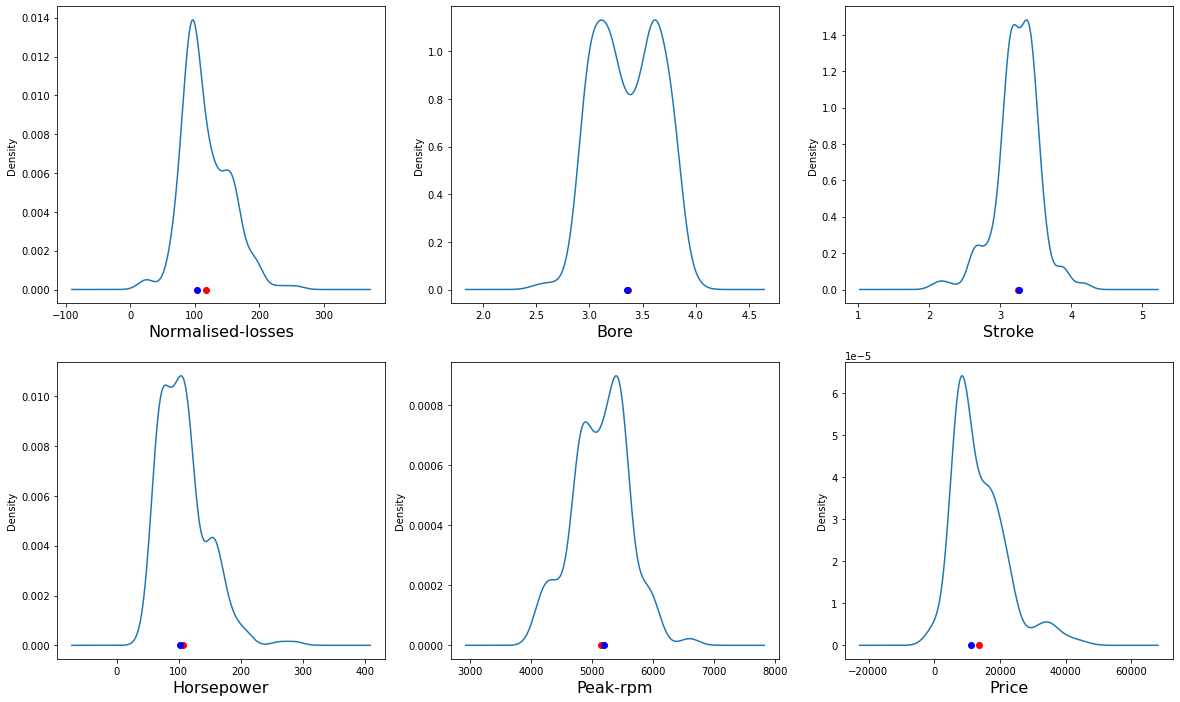

In [14]:
# Plot the densities of the columns with missing values to see if filling with the mean is appropriate
fig, axes = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 12))
r, c = 0, 0
for i, col in enumerate(auto.columns[auto.isna().any()]):
    c = i%3
    r = 1 if i >= 3 else 0
    auto[col].plot(kind='density', ax=axes[r][c])
    # Plot a red point and a blue point for the mean and median of the column respectively
    axes[r][c].plot(auto[col].mean(), 0, 'ro')
    axes[r][c].plot(auto[col].median(), 0, 'bo')
    axes[r][c].set_xlabel(col, fontsize=16)
    
plt.show()

In [15]:
# The bore density plot has two distinct peaks - filling missing values with the mean will increase the density between
# the two peaks and alter the shape of the distribution. There are only 4 rows with missing values - just remove them.
auto = auto.loc[auto['Bore'] == auto['Bore']]

# Fill the remaining missing values with the mean
auto.fillna(auto.mean(), inplace=True)

# Check there are no more null values
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 236
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Insurance risk rating  231 non-null    int64  
 1   Normalised-losses      231 non-null    float64
 2   Make                   231 non-null    object 
 3   Fuel-type              231 non-null    object 
 4   Aspiration             231 non-null    object 
 5   Num-of-doors           231 non-null    object 
 6   Body-style             231 non-null    object 
 7   Drive-wheels           231 non-null    object 
 8   Engine-location        231 non-null    object 
 9   Wheel-base             231 non-null    float64
 10  Length                 231 non-null    float64
 11  Width                  231 non-null    float64
 12  Height                 231 non-null    float64
 13  Curb-weight            231 non-null    int64  
 14  Engine-type            231 non-null    object 
 15  Num-of

## Sanity checks

In [16]:
# Print unique values in every feature to check for typos
for col in auto.columns:
    print(f'{col} unique values: {auto[col].unique()}\n')

Insurance risk rating unique values: [ 3  1  2  0 -1 -2  4]

Normalised-losses unique values: [115.98387097 164.         158.         192.         188.
 121.          98.          81.         118.         148.
 110.         145.         137.         101.          78.
 106.          85.         107.         104.         113.
 129.         115.          93.         142.         161.
 153.         125.         128.         122.         103.
 168.         108.         194.         231.         119.
 154.          74.         186.         150.          83.
 102.          89.          87.          77.          91.
 134.          65.         197.          90.          94.
 256.          95.          25.        ]

Make unique values: ['ALFA-ROMERO' 'AUDI' 'BMW' 'CHEVROLET' 'DODGE' 'HONDA' 'ISUZU' 'JAGUAR'
 'MAZDA' 'MERCEDES-BENZ' 'MERCURY' 'MITSUBISHI' 'NISSAN' 'PEUGOT'
 'PLYMOUTH' 'PORSCHE' 'RENAULT' 'SAAB' 'SUBARU' 'TOYOTA' 'VOLKSWAGEN'
 'VOLVO']

Fuel-type unique values: ['GAS' 'DIESEL']

A

In [17]:
# Insurance risk rating is from -3 to +3, remove the rows which record it outside this range.
auto = auto.loc[abs(auto['Insurance risk rating']) <= 3]
        
# Remove rows which contain negative values for features which can't be negative
numericals = ['Normalised-losses', 'Wheel-base', 'Length', 'Width', 'Height', 'Curb-weight', 'Engine-size', 
              'Bore', 'Stroke', 'Horsepower', 'Peak-rpm', 'City-mpg', 'Highway-mpg', 'Price', 'Num-of-cylinders']
for col in numericals + ['Price']:
    n_rows = auto.shape[0]
    auto = auto.loc[auto[col] > 0]
    
    # Print a statement if any rows were removed
    if auto.shape[0] < n_rows:
        print(f'Removed {n_rows - auto.shape[0]} rows due to negative or zero values in {col} feature')
        
# Impossible values in features recorded as strings can be read from the unique value lists above  - an 
# example of which might be the make of a car doesn't actually exist

Removed 6 rows due to negative or zero values in Price feature


# Task 2

In [18]:
auto['Num-of-cylinders']

0      4
1      6
2      4
3      5
4      5
      ..
229    4
231    4
232    6
233    6
234    4
Name: Num-of-cylinders, Length: 222, dtype: int64

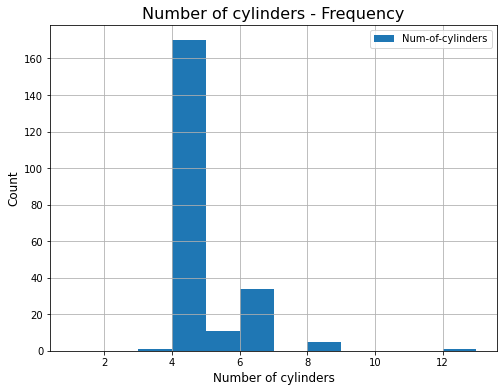

In [19]:
# Task 2: Data Exploration
# 1. Choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values

#Code goes after this line

# Ordinal column: Num-of-cylinders.  Plot data using histogram
auto['Num-of-cylinders'].plot(kind='hist', bins=range(1, 14), figsize=(8, 6))
plt.xlabel('Number of cylinders', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of cylinders - Frequency', fontsize=16)
plt.grid()
plt.legend()
plt.show()

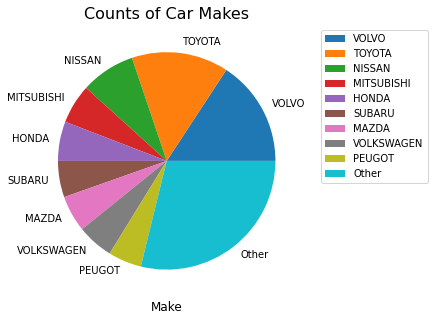

In [20]:
# Nominal columns: Make.  Too many categories to plot nicely - reduce to 11 categories by 
# combining the low frequency makes into an other category
val_counts = auto['Make'].value_counts()
other_count = val_counts[9:].sum()
val_counts = val_counts[:9]
val_counts['Other'] = other_count

# Plot the data using a pie chart
val_counts.plot(kind='pie', figsize=(10,5))
# Move the title to the bottom to prevent overlapping text
plt.ylabel('')
plt.xlabel('Make', fontsize=12)
plt.title('Counts of Car Makes', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

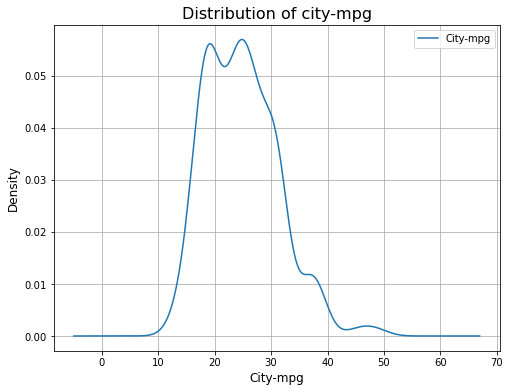

In [21]:
# Numerical column: City-mpg.  Plot using density
auto['City-mpg'].plot(kind='density', figsize=(8, 6))
plt.xlabel('City-mpg', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of city-mpg', fontsize=16)
plt.grid()
plt.legend()
plt.show()

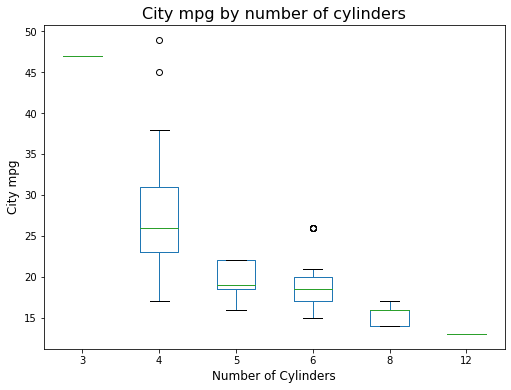

In [22]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line

# Hypothesis: City-mpg increases with the number of cylinders.  Plot the relationship using a boxplots
auto.boxplot(column='City-mpg', by='Num-of-cylinders', figsize=(8, 6), grid=False)
plt.xlabel('Number of Cylinders', fontsize=12)
plt.ylabel('City mpg', fontsize=12)
plt.title('City mpg by number of cylinders', fontsize=16)
# Remove default suptitle set by the boxplot function
plt.suptitle('')
plt.show()

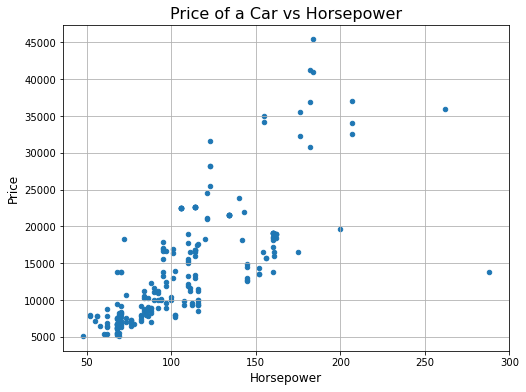

In [23]:
# Hypothesis: The price of the car is positively correlated with the horsepower.  Plot using a scatterplot.
auto.plot(kind='scatter', x='Horsepower', y='Price', figsize=(8, 6))
plt.title('Price of a Car vs Horsepower', fontsize=16)
plt.xlabel('Horsepower', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid()
plt.show()

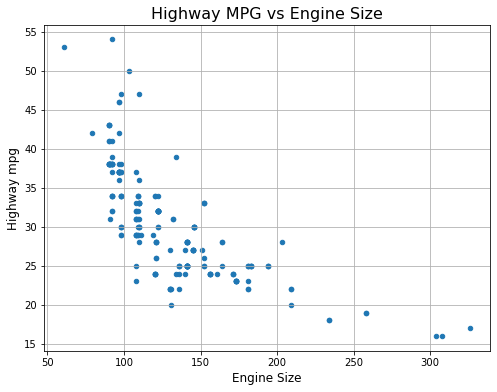

In [24]:
# Hypothesis: Cars with larger engines have lower highway mpg.  Plot using scatterplot
auto.plot(kind='scatter', x='Engine-size', y='Highway-mpg', figsize=(8, 6))
plt.xlabel('Engine Size', fontsize=12)
plt.ylabel('Highway mpg', fontsize=12)
plt.title('Highway MPG vs Engine Size', fontsize=16)
plt.grid()
plt.show()

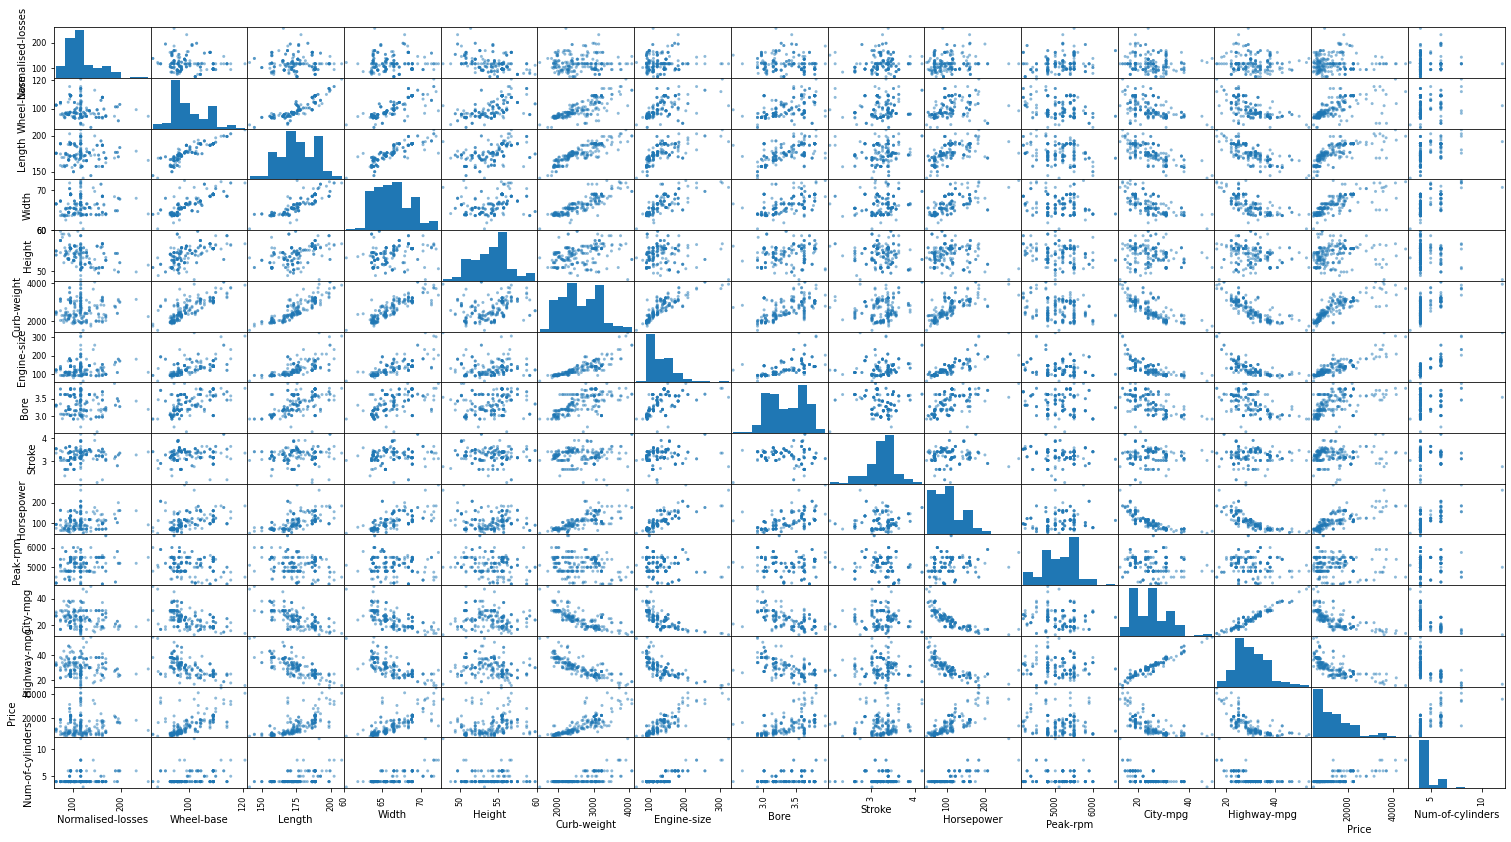

In [25]:
# Task 2: Data Exploration
# 3. Scatter matrix for all numerical columns

#Code goes after this line

# Plot a scatter matrix for all the numerical variables
pd.plotting.scatter_matrix(auto[numericals], figsize=(26, 14))
plt.show()

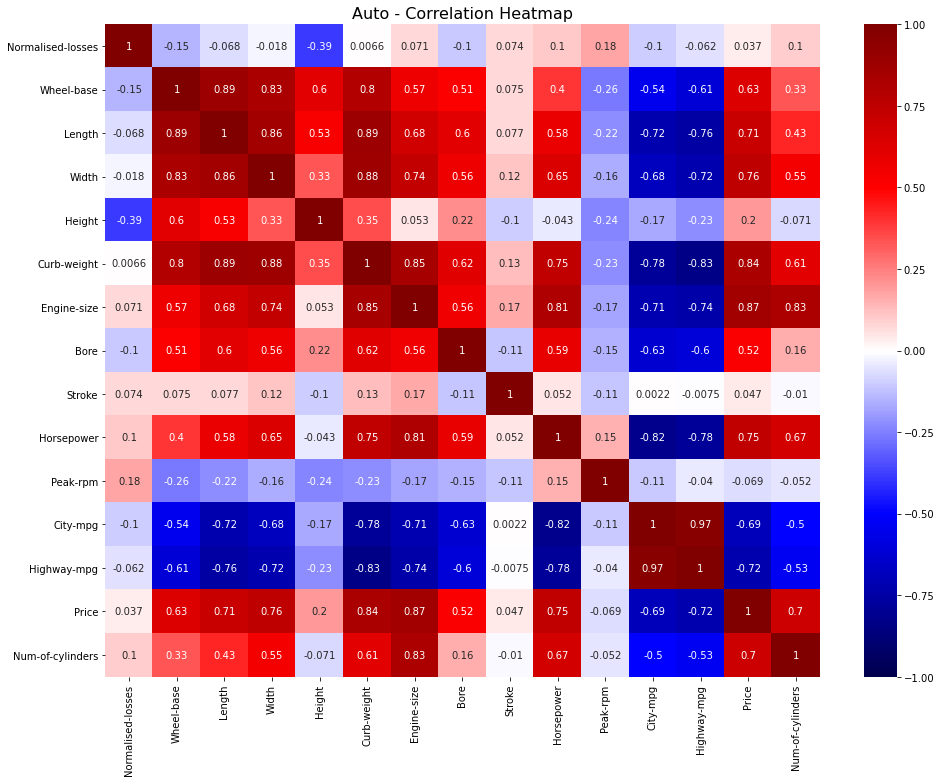

In [26]:
# The scatter matrix is too large to read effectively - instead use a correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(auto[numericals].corr(), center=0, vmin=-1, vmax=1, cmap='seismic', annot=True)
plt.title('Auto - Correlation Heatmap', fontsize=16)
plt.show()